# Imports 

In [1]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import altair_viewer
import matplotlib.dates as mdates 
from matplotlib.dates import DateFormatter
import matplotlib as mpl

import chicago_library

%load_ext autoreload

%autoreload 2


## Load Data
This data was obtained from the City of Chicago. It contains information about the amount of books checked out and renewwed in Chicago Public Libraries by branch. 

It was compiled with datasets corresponding to each year: [2023](https://catalog.data.gov/dataset/libraries-2023-circulation-by-location), 
[2022](https://catalog.data.gov/dataset/libraries-2022-circulation-by-location), 
[2021](https://catalog.data.gov/dataset/libraries-2021-circulation-by-location), 
[2020](https://catalog.data.gov/dataset/libraries-2020-circulation-by-location), 
[2019](https://catalog.data.gov/dataset/libraries-2019-circulation-by-location), 
[2018](https://catalog.data.gov/dataset/libraries-2018-circulation-by-location), 
[2017](https://catalog.data.gov/dataset/libraries-2017-circulation-by-location), 
[2016](https://catalog.data.gov/dataset/libraries-2016-circulation-by-location), 
[2015](https://catalog.data.gov/dataset/libraries-2015-circulation-by-location), 
[2014](https://catalog.data.gov/dataset/libraries-2014-circulation-by-location), 
[2013](https://catalog.data.gov/dataset/libraries-2013-circulation-by-location), 
[2012](https://catalog.data.gov/dataset/libraries-2012-circulation-by-location), 
[2011](https://catalog.data.gov/dataset/libraries-2011-circulation-by-location), 
[2010](https://catalog.data.gov/dataset/libraries-2010-circulation-by-location)

In [2]:
library_data = chicago_library.load_data()

# Colors

In [3]:

colors_list = []
#colors_list.append(['#1f78b4', '#a6cee3', '#b2df8a', '#33a02c', '#fb9a99'])
colors_list.append(['#33a02c',  '#a6cee3', '#b2df8a', '#1f78b4', '#fb9a99'])
#colors_list.append(['#14453d', '#48beff', '#3dfaff', '#43c59e', '#3d7068'])


# Group the data for the plots

In [4]:
# Get the rows with those dates
df_2020 = library_data[library_data['year'] == 2020]
df_2023 = library_data[library_data['year'] == 2023]

group_region_year = library_data.groupby(['region', 'year'])['transactions'].sum().unstack('region').reset_index()
group_region_date = library_data.groupby(['region', 'date'])['transactions'].sum().unstack('region').reset_index()
group_region_date_2020 = df_2020.groupby(['region', 'date'])['transactions'].sum().unstack('region').reset_index()
group_region_date_2023 = df_2023.groupby(['region', 'date'])['transactions'].sum().unstack('region').reset_index()


# Plots

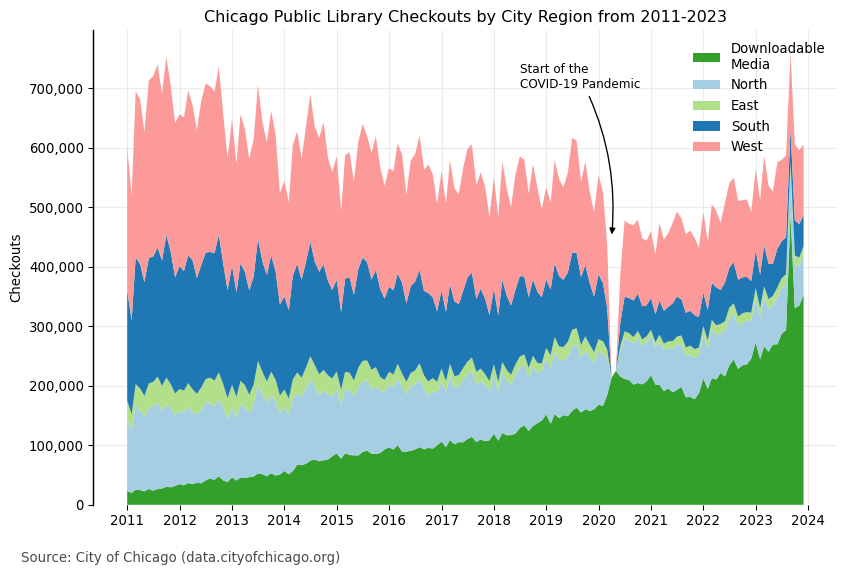

In [6]:
for colors in colors_list:
    #plt.style.use('default')
    data = group_region_date
    fig, ax = plt.subplots(figsize=(10,7.5), dpi = 96)
    ax.stackplot(data['date']
                 , [data['City Wide'], data['North'], data['East'],data['South'],data['West']]
                 , labels=['Downloadable\nMedia', 'North', 'East', 'South', 'West']
                 , colors = colors)

    ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=0)
    ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
    ax.set_title('Chicago Public Library Checkouts by City Region from 2011-2023')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax.annotate('Start of the \nCOVID-19 Pandemic',
                (data['date'].iloc[111], 450000),
                xytext=(data['date'].iloc[90], 700000),
                ha='left', fontsize=9, arrowprops=dict(arrowstyle='-|>', facecolor='k', connectionstyle="arc3,rad=-0.15"))

    ax.set_ylabel('Checkouts')
    ax.text(x=0.05, y=0.12, s="Source: City of Chicago (data.cityofchicago.org)", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

    ax.set_axisbelow(True)
    # Remove the spines
    ax.spines[['top','right','bottom']].set_visible(False)

    # Make the left spine thicker
    ax.spines['left'].set_linewidth(1.1)
    #ax.plot([0.05, .9], [.9, .9], transform=fig.transFigure, clip_on=False, color='black', linewidth=.6)

    ax.legend(frameon=False)
    plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.86, wspace=None, hspace=None)
    fig.savefig(f'./images/chicago_library_transactions.svg', bbox_inches='tight')
    plt.show()